In [136]:
from pathlib import Path 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [137]:
folder = Path('./params/N6')
for f in folder.iterdir():
    print(f.name.split('C')[-1].rstrip('.dat'))

0.01
0.3
0.05
0.1
1.0
0.5
0.0


In [138]:
C_list = []
percent_seg = []
percent_alt = []
eff = []
ineq = []
eff_er = []
ineq_er = []
for f in folder.iterdir():
    C = f.name.split('C')[-1].rstrip('.dat')
    df = pd.read_table(f, sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])
    C_list.append(C)
    
    mx = df['inequality'].max()
    mn = 0.98*mx
    df_seg = df[(df['inequality']>mn) & (df['cond_entropy']<0.01) & (df['efficiency']>0.48)]
    percent_seg.append(df_seg.shape[0]/df.shape[0])
    #print(df_seg.head())

    mn = 0.02*mx
    df_alt = df[(df['inequality']<mn) & (df['cond_entropy']<0.01) & (df['efficiency']>0.48)]
    percent_alt.append(df_alt.shape[0]/df.shape[0])
    #print(df_alt.head())

    eff.append(df['efficiency'].mean())
    ineq.append(df['inequality'].mean())
    eff_er.append(df['efficiency'].std())
    ineq_er.append(df['inequality'].std())

df_c = pd.DataFrame({'c':C_list, '%seg':percent_seg, '%alt':percent_alt, 'eff':eff, 'ineq':ineq, 'eff_er':eff_er, 'ineq_er':ineq_er})
df_c.c.astype('float')
df_c.sort_values(by='c',inplace=True)
df_c.head()

,c,%seg,%alt,eff,ineq,eff_er,ineq_er
6,0.0,0.063228,0.000000,0.221265,0.187223,0.166841,0.149135
0,0.01,0.000000,0.003328,0.368947,0.128161,0.049020,0.087968
2,0.05,0.000000,0.003328,0.397823,0.123427,0.033995,0.079700
3,0.1,0.000000,0.004992,0.404757,0.120247,0.029773,0.073996
1,0.3,0.000000,0.003328,0.407571,0.102034,0.023763,0.061537


In [139]:
#df_c['c'].iloc[df_c['eff'].argmax()]

<Axes: xlabel='c', ylabel='%'>

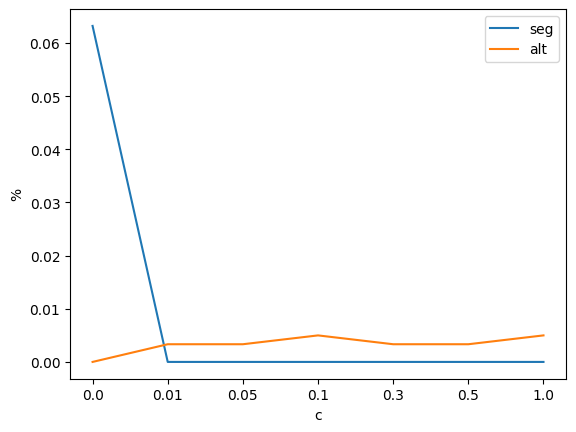

In [140]:
ax = sns.lineplot(x='c',y='%seg',data=df_c,label='seg')
ax.set_ylabel('%')
sns.lineplot(x='c',y='%alt',data=df_c,label='alt')

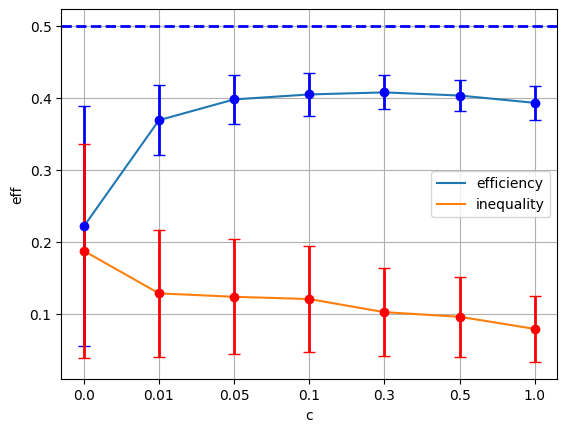

In [141]:
ax = sns.lineplot(x='c',y='eff',data=df_c, label='efficiency')
ax.axhline(y=0.5, color='blue', linestyle='--', linewidth=2)
plt.errorbar(x=df_c['c'], y=df_c['eff'], yerr=df_c["eff_er"], fmt='o', color='blue', ecolor='b', elinewidth=2, capsize=4)
sns.lineplot(x='c',y='ineq',data=df_c, label='inequality')
plt.errorbar(x=df_c['c'], y=df_c['ineq'], yerr=df_c["ineq_er"], fmt='o', color='red', ecolor='r', elinewidth=2, capsize=4)
plt.grid()